In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/public-study/EmoTrak-emotrak-2018-09-27T10_57_10.050Z.csv')

In [15]:
pd.set_option('display.max_columns', 999)

In [17]:
pd.set_option('display.max_rows', 999)

In [19]:
pd.options.display.max_colwidth = 900

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7426 entries, 0 to 7425
Data columns (total 61 columns):
row_id                                            7426 non-null int64
user_id                                           7426 non-null object
record_id                                         7426 non-null object
recordReceived_ISO8601                            7426 non-null object
recordReceived_secondsSinceMidnight1Jan1970UTC    7426 non-null int64
surveyNumber                                      7426 non-null int64
timestamp                                         7426 non-null int64
startTime                                         7426 non-null object
associatedAlert                                   6696 non-null object
responseLagSeconds                                6696 non-null float64
dailyAlertNumber                                  6696 non-null float64
spendingDay                                       755 non-null object
spendingDayOther                            

In [3]:
df.head()

,row_id,user_id,record_id,recordReceived_ISO8601,recordReceived_secondsSinceMidnight1Jan1970UTC,surveyNumber,timestamp,startTime,associatedAlert,responseLagSeconds,...,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,workPositiveInfluence,dissatisfied,mindWandered
0,409266,ccc54e93-ba0c-4b5f-8d7a-b065a12b4289.48809b947...,48822288b1f.b804e245-d906-4ffe-b5d0-0a1b398eebf2,2016-10-16T15:34:28.027Z,1476632068,0,1476580462,2016-10-15T18:14:22.402-0700,4882202063c.0376d98d-8114-4c1d-8da3-40424cfb91bc,2044.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,409245,4d4cfd22-afd3-4720-8f89-b49372007096.487b344df...,487f01ae909.bbab99de-cd4e-4cf3-a9cf-ddc7fdb3e1d4,2016-10-16T15:28:04.277Z,1476631684,1,1476496584,2016-10-14T18:56:24.572-0700,487f0034ecd.ee8ce6d4-b763-47df-b812-53e6b394edf0,7642.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,409247,4d4cfd22-afd3-4720-8f89-b49372007096.487b344df...,487f73adefa.f811e180-d1fb-4341-9840-8d2fb39a428b,2016-10-16T15:28:06.452Z,1476631686,2,1476508583,2016-10-14T22:16:23.450-0700,487f72a2f81.5781fea8-2376-4448-9906-c5072b70f11c,1330.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,409313,b4ddb64a-9204-4655-9b89-405966850101.487b7c739...,487bdc11f96.c499fc4c-72c6-45e6-bfaa-abbe51984073,2016-10-16T16:03:42.195Z,1476633822,1,1476412108,2016-10-13T19:28:28.913-0700,487bda9559a.9bf80edb-8652-4b87-8be2-0c23ccff0e06,73.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,409322,b4ddb64a-9204-4655-9b89-405966850101.487b7c739...,4881ddddc1d.f3159f84-280b-41a7-bee5-1913b2d6a45e,2016-10-16T16:04:05.588Z,1476633845,6,1476573377,2016-10-15T16:16:17.068-0700,4881dc8e36c.f2d82775-f342-4d53-bec4-dab38817d33e,56.0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
df[df['mindWandered'].notnull()]['user_id'].nunique()

242

In [7]:
df['user_id'].nunique()

347

In [20]:
df[df['otherEmotion'].notnull()][['specificEmotion', 'otherEmotion']]

,specificEmotion,otherEmotion
40,notListed,Fatigued
41,notListed,Tired
44,notListed,Curious and thoughtful
60,notListed,Tired
66,notListed,Satisfied
73,notListed,Bored
78,notListed,CapAble
79,notListed,Tired
82,notListed,Relieved
94,notListed,Interested


In [5]:
df['mindWandered'].value_counts()

no            2894
unpleasant    1029
neutral        979
pleasant       731
Name: mindWandered, dtype: int64

In [6]:
df['dissatisfied'].value_counts()

0.00    2118
0.25    1222
0.50    1157
0.75     705
1.00     431
Name: dissatisfied, dtype: int64

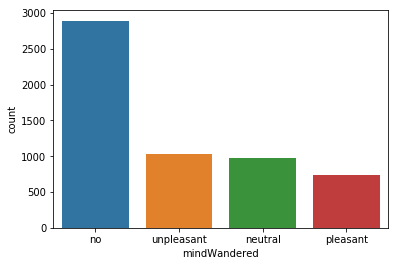

In [8]:
sns.countplot(x=df['mindWandered']);

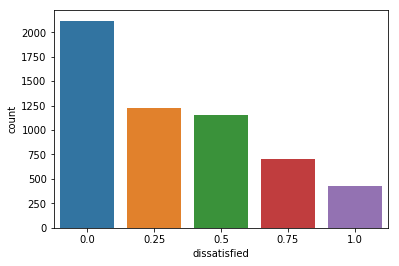

In [9]:
sns.countplot(x=df['dissatisfied']);

In [10]:
df.columns

Index(['row_id', 'user_id', 'record_id', 'recordReceived_ISO8601',
       'recordReceived_secondsSinceMidnight1Jan1970UTC', 'surveyNumber',
       'timestamp', 'startTime', 'associatedAlert', 'responseLagSeconds',
       'dailyAlertNumber', 'spendingDay', 'spendingDayOther', 'sleptFor',
       'tiredness', 'connectedColleagues', 'connectedPatients',
       'feelingEmotion', 'generalEmotion', 'specificEmotion', 'otherEmotion',
       'intensity', 'trigger', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 'bodySensationForehead', 'bodySensationEyes',
       'bodySensationJaw', 'bodySensationNeck', 'bodySensationShoulders',
       'bodySensationChest', 'bodySensationArms', 'bodySensationHands',
       'bodySensationStomach', 'bodySensationBowel', 'bodySensationLegs',
       'bodySensationFeet', 'bodySensationLowerBack', 'bodySensationUpperBack',
       'bodySensationOther', 'bodySensationOtherLocation', 'emotionResponse',
       'emotionDuration', 'emotionResponseHel

In [13]:
df[['generalEmotion', 'specificEmotion', 'dissatisfied',
       'mindWandered']].groupby(['generalEmotion', 'specificEmotion'])['dissatisfied'].value_counts()

generalEmotion  specificEmotion  dissatisfied
anger           angry            1.00             42
                                 0.75             24
                                 0.00             23
                                 0.50             20
                                 0.25             19
                annoyed          0.50             79
                                 0.25             55
                                 0.75             53
                                 0.00             49
                                 1.00             19
                frustrated       0.50             92
                                 0.75             63
                                 0.25             57
                                 0.00             52
                                 1.00             41
                irritated        0.50             80
                                 0.25             58
                                 0.00             55
